In [1]:
%run CommonCodeForExperiments.ipynb

In [2]:
import dowhy
from dowhy import CausalModel
import pandas as pd
import numpy as np
aitia = App()

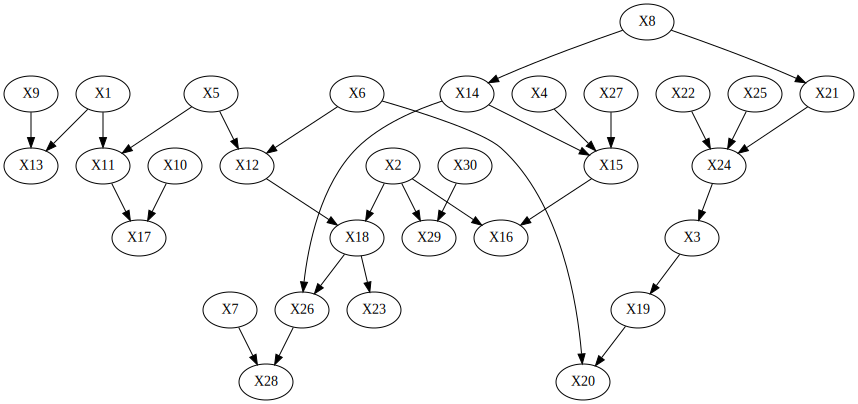

In [3]:
random_scm1 = aitia.data.random_scm_treatment_outcome()
random_scm1.cgm.draw()

In [5]:
df = random_scm1.sample(2000)
df

,X30,X27,X25,X22,X10,X9,X8,X21,X24,X3,...,X29,X18,X26,X28,X23,X16,X1,X13,X11,X17
0,0.726903,0.972923,-0.177570,-0.249444,1.897685,-0.097775,0.036683,0.304561,0.137791,0.667120,...,1.998092,1,-0.748316,0.410989,1.436918,1.902939,0.651842,-0.239811,-0.831149,1.973088
1,-0.030707,0.145362,-1.403089,2.158771,-0.598227,0.462531,-0.407597,-0.434474,-0.549328,1.840182,...,-1.188768,0,-0.632334,0.638024,-0.460203,-1.440309,1.491025,1.080375,-0.262742,-2.462870
2,1.901859,0.426348,0.099990,0.246046,-0.343681,-0.039170,0.304631,-0.106486,-0.383111,-1.468018,...,1.263147,0,-1.158784,-2.199656,-2.530080,-1.284540,0.955531,-0.474741,-1.433921,0.321795
3,-1.249109,-0.172616,-0.308044,-0.273150,-1.693679,0.758745,-0.626933,-0.066265,0.628508,0.667117,...,-0.094902,0,-1.269154,-0.723960,-0.415852,1.613907,0.155462,0.333110,-0.397956,-1.034457
4,-0.490097,0.951439,-0.869768,0.810558,0.304616,0.057508,-1.196546,-0.361171,-0.015004,0.510167,...,0.048907,1,0.505130,0.837391,0.451064,1.417373,0.601358,1.486660,2.200520,-1.017495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.084271,-2.932580,-0.028659,-0.271721,-0.099724,-2.092832,0.039791,-0.657548,1.332442,1.342099,...,-2.471263,1,0.563736,1.973539,1.946504,-1.306415,0.532944,-1.005336,0.229495,-0.263214
1996,-0.333386,0.401799,-0.910665,2.017384,-1.235290,2.369455,-1.048158,-0.568454,1.269353,0.206345,...,1.804269,0,0.253664,0.707401,-0.679452,0.410846,1.676974,0.030980,1.675881,0.272693
1997,-1.328451,-0.389632,1.321353,-0.750668,0.117048,-1.093917,0.796557,-0.653943,-0.464122,0.800539,...,-0.281532,0,0.674008,-1.188676,1.297924,-1.160920,1.345607,-0.706591,1.988104,-1.690014
1998,0.441451,-0.697099,0.106427,0.852649,-0.199155,-1.091909,-1.302580,-0.715810,-0.228432,-0.076057,...,0.135649,0,1.488430,0.699755,1.731208,0.593748,-0.704567,1.460848,-0.596240,0.847773


In [6]:
nx.write_gml(random_scm1.cgm.dag, "./random1.gml")

In [7]:
# Create a causal model from the data and given common causes.
xs = ""
for i in range(1,20):
    xs += ("x"+str(i)+"+")
model=CausalModel(
        data = df,
        graph="./random1.gml",
        treatment='X12',
        outcome='X18',
        common_causes=xs.split('+'))

INFO:dowhy.causal_graph:If this is observed data (not from a randomized experiment), there might always be missing confounders. Adding a node named "Unobserved Confounders" to reflect this.
INFO:dowhy.causal_model:Model to find the causal effect of treatment ['X12'] on outcome ['X18']


In [8]:
#Identify the causal effect
identified_estimand = model.identify_effect()

INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['U']


WARN: Do you want to continue by ignoring any unobserved confounders? (use proceed_when_unidentifiable=True to disable this prompt) [y/n] y


INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:['X6', 'X5']


In [14]:

# Estimate the causal effect and compare it with Average Treatment Effect
estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression", test_significance=True
)

print(estimate)

print("Causal Estimate is " + str(estimate.value))
data_1 = df[df["X12"]==1]
data_0 = df[df["X12"]==0]

print("ATE", np.mean(data_1["X18"])- np.mean(data_0["X18"]))

INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator
INFO:dowhy.causal_estimator:b: X18~X12+X12*X2


                            OLS Regression Results                            
Dep. Variable:                    X18   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     100.1
Date:                Fri, 26 Jun 2020   Prob (F-statistic):           3.61e-42
Time:                        10:06:14   Log-Likelihood:                -1355.9
No. Observations:                2000   AIC:                             2718.
Df Residuals:                    1997   BIC:                             2735.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4979      0.015     32.343      0.0

In [18]:
refute_results=model.refute_estimate(identified_estimand, estimate,
        method_name="random_common_cause")
print(refute_results)

INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator
INFO:dowhy.causal_estimator:b: X18~X12+w_random+X12*X2


                            OLS Regression Results                            
Dep. Variable:                    X18   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     67.45
Date:                Fri, 26 Jun 2020   Prob (F-statistic):           1.52e-41
Time:                        10:18:45   Log-Likelihood:                -1354.9
No. Observations:                2000   AIC:                             2718.
Df Residuals:                    1996   BIC:                             2740.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4984      0.015     32.373      0.0